In [1]:
## 04-Evaluation-Homework

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
### Dataset
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv'

data = pd.read_csv(url)
data.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [4]:
# Check missing values
data.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [5]:
# handle missing values Cat= 'NA' | Num= 0.0

categorical = data.select_dtypes(include='object').columns.tolist()
numerical = data.select_dtypes(include=['int64','float64']).columns.tolist()


In [6]:
print("cat: ",categorical)
numerical

cat:  ['lead_source', 'industry', 'employment_status', 'location']


['number_of_courses_viewed',
 'annual_income',
 'interaction_count',
 'lead_score',
 'converted']

In [7]:
# numerical = ['number_of_courses_viewed','annual_income','interaction_count','lead_score']

In [8]:
# numerical.remove('converted')  # target

data[categorical] = data[categorical].fillna('NA')
data[numerical] = data[numerical].fillna(0.0)

In [9]:
data

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NA,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NA,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1
...,...,...,...,...,...,...,...,...,...
1457,referral,manufacturing,1,0.0,self_employed,north_america,4,0.53,1
1458,referral,technology,3,65259.0,student,europe,2,0.24,1
1459,paid_ads,technology,1,45688.0,student,north_america,3,0.02,1
1460,referral,NA,5,71016.0,self_employed,north_america,0,0.25,1


In [10]:
# process
data.isnull().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

In [11]:
# Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` function for that with `random_state=1`
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=len(df_test), random_state=1)


In [12]:
len(df_train), len(df_val), len(df_test)

(876, 293, 293)

In [13]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [14]:
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

del df_train['converted']
del df_val['converted']
del df_test['converted']

In [15]:
df_train

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score
0,events,manufacturing,2,95543.0,unemployed,europe,3,0.78
1,referral,NA,1,54924.0,student,south_america,6,0.39
2,organic_search,healthcare,2,77352.0,unemployed,europe,2,0.22
3,paid_ads,other,2,34600.0,employed,south_america,2,0.31
4,paid_ads,education,0,43615.0,unemployed,south_america,2,0.01
...,...,...,...,...,...,...,...,...
871,NA,other,5,67314.0,NA,europe,2,0.87
872,events,education,6,63996.0,NA,australia,4,0.92
873,organic_search,finance,1,73702.0,unemployed,north_america,2,0.55
874,events,technology,1,93341.0,student,middle_east,4,0.99


In [16]:
# Q1: ROC AUC for numerical features
from sklearn.metrics import roc_auc_score

numerical_features = ['lead_score','number_of_courses_viewed','interaction_count','annual_income']

# auc_scores = {}
for num in numerical_features:
    auc = roc_auc_score(y_train, df_train[num])
    if auc < 0.5:
        auc = roc_auc_score(y_train, - df_train[num])
    print(f'{num}, {round(auc,3)}')

lead_score, 0.614
number_of_courses_viewed, 0.764
interaction_count, 0.738
annual_income, 0.552


In [17]:
# Q2 : Logistic Regression
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression


# features = df_train.columns.tolist()
# features.remove('converted')

# Prepare data
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(df_train[categorical+numerical_features].to_dict(orient='records'))
X_val = dv.transform(df_val[categorical+numerical_features].to_dict(orient='records'))

# Train model
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [18]:
# Predict probabilities
y_pred_val = model.predict_proba(X_val)[:,1]

# Compute AUC
ras = round(roc_auc_score(y_val, y_pred_val),3)
ras

0.817

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_pred_val >= 0.5)

0.6996587030716723

In [20]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred_val >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.584
0.05 0.584
0.10 0.584
0.15 0.584
0.20 0.584
0.25 0.584
0.30 0.594
0.35 0.601
0.40 0.642
0.45 0.679
0.50 0.700
0.55 0.747
0.60 0.747
0.65 0.734
0.70 0.693
0.75 0.655
0.80 0.614
0.85 0.567
0.90 0.495
0.95 0.433
1.00 0.416


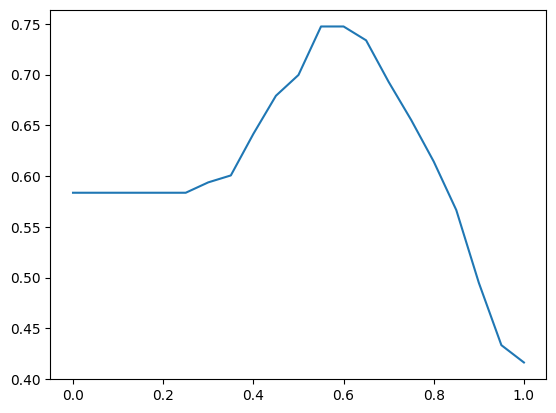

In [21]:
plt.plot(thresholds, scores)

In [22]:
from collections import Counter
print(Counter(y_pred_val >= 1.0))
print('mean: ',1 - y_val.mean())

Counter({np.False_: 293})
mean:  0.41638225255972694


In [23]:
### Confusion table

actual_positive = (y_val == 1)
actual_negative = (y_val == 0)


t = 0.5
predict_positive = (y_pred_val >= t)
predict_negative = (y_pred_val < t)


tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()


confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[ 41,  81],
       [  7, 164]])

In [24]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.14, 0.28],
       [0.02, 0.56]])

In [25]:
#Q3: Precision and Recall
thresholds = np.linspace(0, 1, 100)
scores = []

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred_val >= t)
    predict_negative = (y_pred_val < t)

    tp = (actual_positive & predict_positive).sum()
    tn = (actual_negative & predict_negative).sum()

    fp = (actual_negative & predict_positive).sum()
    fn = (actual_positive & predict_negative).sum()

    scores.append((t, tp, tn, fp, fn))

columns = ["threshold", "tp", "tn", "fp", "fn"]
df_scores = pd.DataFrame(scores, columns=columns)
df_scores[::10]

,threshold,tp,tn,fp,fn
0,0.000000,171,0,122,0
10,0.101010,171,0,122,0
20,0.202020,171,0,122,0
30,0.303030,171,3,119,0
40,0.404040,170,17,105,1
50,0.505051,163,43,79,8
60,0.606061,149,71,51,22
70,0.707071,104,99,23,67
80,0.808081,63,116,6,108
90,0.909091,18,121,1,153


In [26]:
df_scores["precision"] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores["recall"] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores[::10]

,threshold,tp,tn,fp,fn,precision,recall
0,0.000000,171,0,122,0,0.583618,1.000000
10,0.101010,171,0,122,0,0.583618,1.000000
20,0.202020,171,0,122,0,0.583618,1.000000
30,0.303030,171,3,119,0,0.589655,1.000000
40,0.404040,170,17,105,1,0.618182,0.994152
50,0.505051,163,43,79,8,0.673554,0.953216
60,0.606061,149,71,51,22,0.745000,0.871345
70,0.707071,104,99,23,67,0.818898,0.608187
80,0.808081,63,116,6,108,0.913043,0.368421
90,0.909091,18,121,1,153,0.947368,0.105263


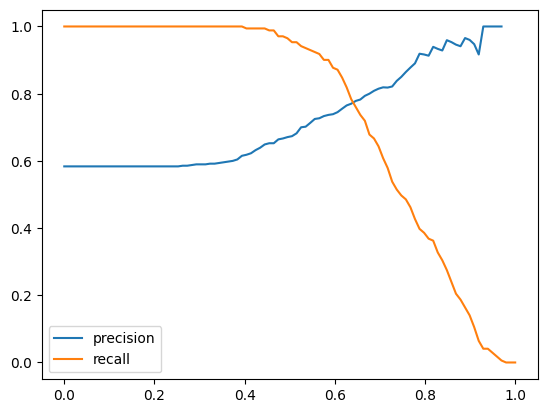

In [27]:
plt.plot(df_scores.threshold, df_scores.precision, label = "precision")
plt.plot(df_scores.threshold, df_scores.recall, label = "recall")

plt.legend()
plt.show()

In [28]:
# Q4: F1 score
df_scores["f1_score"] = 2 * df_scores.precision * df_scores.recall / (df_scores.precision + df_scores.recall)
df_scores[::10]

,threshold,tp,tn,fp,fn,precision,recall,f1_score
0,0.000000,171,0,122,0,0.583618,1.000000,0.737069
10,0.101010,171,0,122,0,0.583618,1.000000,0.737069
20,0.202020,171,0,122,0,0.583618,1.000000,0.737069
30,0.303030,171,3,119,0,0.589655,1.000000,0.741866
40,0.404040,170,17,105,1,0.618182,0.994152,0.762332
50,0.505051,163,43,79,8,0.673554,0.953216,0.789346
60,0.606061,149,71,51,22,0.745000,0.871345,0.803235
70,0.707071,104,99,23,67,0.818898,0.608187,0.697987
80,0.808081,63,116,6,108,0.913043,0.368421,0.525000
90,0.909091,18,121,1,153,0.947368,0.105263,0.189474


In [29]:
df_scores.loc[df_scores["f1_score"] == df_scores["f1_score"].max()]

,threshold,tp,tn,fp,fn,precision,recall,f1_score
55,0.555556,158,62,60,13,0.724771,0.923977,0.812339


In [30]:
# Prepare data
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(df_train[categorical+numerical_features].to_dict(orient='records'))
X_val = dv.transform(df_val[categorical+numerical_features].to_dict(orient='records'))

In [31]:
# Q5: 5-Fold CV
from sklearn.model_selection import KFold

def train(df_train, y_train, C=1):
    dicts = df_train[categorical + numerical_features].to_dict(orient = "records")

    dv = DictVectorizer(sparse = False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

def predict(df, dv, model):
    dicts = df[categorical + numerical_features].to_dict(orient = "records")

    X = dv.fit_transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [32]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
 
    y_train = df_train.converted.values
    y_val = df_val.converted.values
 
    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)
 
    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print(scores)
print('mean score:{}' 'std score:', np.mean(scores), np.std(scores))

[0.8060745924216483, 0.8713738368910783, 0.7754320118852139, 0.8018368617683685, 0.8558272713202291]
mean score:{}std score: 0.8221089148573075 0.03580711942905165


In [33]:
# Q6: Hyperparameter Tuning
n_splits = 5

for C in [0.000001, 0.001, 1]:
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
     
        y_train = df_train.converted.values
        y_val = df_val.converted.values
     
        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
     
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

C=1e-06 0.560 +- 0.024
C=0.001 0.867 +- 0.029
C=1 0.822 +- 0.036


In [34]:
for C in [0.000001, 0.001, 1]:
    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
     
        y_train = df_train.converted.values
        y_val = df_val.converted.values
     
        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
     
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

C=1e-06 0.560 +- 0.024
C=0.001 0.867 +- 0.029
C=1 0.822 +- 0.036


In [35]:
dv, model = train(df_full_train, df_full_train.converted.values, C=1.0)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

0.8172202350536536